In [1]:
# GOAL: HAVE EACH ANALYSIS SECTION COMPUTE A STANDARD SET OF CALCULATIONS FOR RISK METRICS AND CORRELATION

"""
For now, we keep it simple. If we need to expand, we can. 
We are taking what we need to in order to understand how each basket of currencies 
is correlated to the market proxy (bitcoin)
"""

'\nFor now, we keep it simple. If we need to expand, we can. \nWe are taking what we need to in order to understand how each basket of currencies \nis correlated to the market proxy (bitcoin)\n'

In [2]:
# STEP 1: IMPORT DEPENDENCIES
#For basic calculations:
import pandas as pd
import numpy as np
import csv
from pathlib import Path

#For Heatmap:
import seaborn as sns
%matplotlib inline

In [3]:
# STEP 2: IMPORT DATA AS DATAFRAME
"""
Determnine if we are reading csv data, running individual api calls, or querying an in-house database
"""
#reading in csv data
df_2019 = pd.read_csv(
    Path('2019_data.csv')
).set_index('Month')

In [4]:
# View the dataframe
df_2019.describe()

,price_open,price_close,volume_traded,price_open.1,price_close.1,volume_traded.1,price_open.2,price_close.2,volume_traded.2,price_open.3,...,volume_traded.9,price_open.10,price_close.10,volume_traded.10,price_open.11,price_close.11,volume_traded.11,price_open.12,price_close.12,volume_traded.12
count,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01,12.000000,12.000000,1.200000e+01,12.000000,...,1.200000e+01,12.000000,12.000000,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01
mean,7023.075000,7312.850000,221273.761575,177.963333,177.819167,2.401502e+06,66.813333,67.751667,8.939897e+05,0.054620,...,1.448699e+07,0.997450,0.997275,9.682839e+07,96.099583,93.018667,70688.328656,0.000171,0.000164,2.460643e+06
std,2779.617099,2574.480556,85781.870233,55.548182,55.666147,1.271679e+06,30.389105,29.232599,4.052974e+05,0.018386,...,2.796220e+07,0.004380,0.004335,5.194074e+07,35.003744,38.388461,25913.654181,0.000592,0.000569,8.523918e+06
min,3409.600000,3409.600000,101402.466300,105.740000,105.690000,9.409017e+05,29.880000,31.180000,4.176216e+05,0.038070,...,0.000000e+00,0.989800,0.989600,5.175998e+07,55.049000,41.027000,39131.475560,0.000000,0.000000,0.000000e+00
25%,4019.725000,4977.950000,168510.613375,139.480000,139.597500,1.377492e+06,46.592500,46.760000,5.936415e+05,0.040363,...,0.000000e+00,0.994575,0.994750,6.090942e+07,71.564000,69.580000,48989.221260,0.000000,0.000000,0.000000e+00
50%,7934.450000,7934.450000,199439.616100,166.115000,166.140000,2.187496e+06,59.215000,59.350000,7.955997e+05,0.043795,...,0.000000e+00,0.999650,0.998850,6.900030e+07,81.094500,80.480000,66266.216880,0.000000,0.000000,0.000000e+00
75%,9264.450000,9261.100000,268216.650475,191.467500,191.507500,3.123758e+06,79.875000,79.845000,1.058437e+06,0.069333,...,9.345538e+06,1.000550,1.000550,1.331775e+08,110.125000,110.125000,88497.181737,0.000000,0.000000,0.000000e+00
max,10749.400000,10752.300000,362948.578000,289.880000,289.500000,4.943666e+06,122.340000,122.000000,1.711144e+06,0.089000,...,8.256405e+07,1.002000,1.002200,2.115491e+08,165.999000,166.000000,109560.349500,0.002052,0.001970,2.952772e+07


In [5]:
# Clean the dataframe to only include the closing price
final_2019_df = pd.DataFrame()
final_2019_df['BTC_Monthly_Close'] = df_2019['price_close']
final_2019_df['ETH_Monthly_Close'] = df_2019['price_close.1']
final_2019_df['LTC_Monthly_Close'] = df_2019['price_close.2']
final_2019_df['ADA_Monthly_Close'] = df_2019['price_close.3']
final_2019_df['XLM_Monthly_Close'] = df_2019['price_close.4']
final_2019_df['XRP_Monthly_Close'] = df_2019['price_close.5']
final_2019_df['LISK_Monthly_Close'] = df_2019['price_close.6']
final_2019_df['WAVES_Monthly_Close'] = df_2019['price_close.7']
final_2019_df['ZEC_Monthly_Close'] = df_2019['price_close.8']
final_2019_df['SC_Monthly_Close'] = df_2019['price_close.9']
final_2019_df['USDT_Monthly_Close'] = df_2019['price_close.10']
final_2019_df['DASH_Monthly_Close'] = df_2019['price_close.11']
final_2019_df['DOGE_Monthly_Close'] = df_2019['price_close.12']

final_2019_df

,BTC_Monthly_Close,ETH_Monthly_Close,LTC_Monthly_Close,ADA_Monthly_Close,XLM_Monthly_Close,XRP_Monthly_Close,LISK_Monthly_Close,WAVES_Monthly_Close,ZEC_Monthly_Close,SC_Monthly_Close,USDT_Monthly_Close,DASH_Monthly_Close,DOGE_Monthly_Close
Month,,,,,,,,,,,,,
January,3409.6,105.69,31.18,0.038247,0.080864,0.30649,0.000000,0.0000,48.67,0.00000,0.9940,66.550,0.00000
February,3793.7,134.52,45.35,0.042765,0.083897,0.31267,0.000000,0.0000,50.85,0.00000,0.9950,80.960,0.00000
March,4095.2,141.29,60.29,0.069574,0.107759,0.30811,0.000000,0.0000,58.18,0.00000,0.9975,110.200,0.00000
April,5272.2,160.36,73.51,0.069310,0.099763,0.30511,0.000000,0.0000,60.03,0.00000,0.9896,110.100,0.00000
May,8552.9,267.56,114.64,0.089212,0.133041,0.43844,0.000000,0.0000,90.56,0.00000,1.0005,166.000,0.00000
June,10752.3,289.50,122.00,0.082022,0.103835,0.39216,0.000000,0.0000,102.11,0.00000,0.9900,155.767,0.00000
July,10090.1,218.68,98.85,0.060128,0.083740,0.31997,0.000000,0.0000,67.82,0.00000,1.0003,108.404,0.00000
August,9604.3,171.92,64.29,0.044879,0.062099,0.25799,0.000000,0.0000,44.87,0.00000,1.0002,80.000,0.00000
September,8310.0,181.53,56.12,0.038933,0.061930,0.25674,0.000000,0.0000,38.84,0.00000,1.0022,70.590,0.00000


In [6]:
# STEP 3: CALCULATE Monthly RETURNS FOR EACH CURRENCY IN Designated Time range from  DATAFRAME, DROP NULL VALUES
"""

Will need: .pct_change().dropna(inplace = True)

"""
btc_2019_df = final_2019_df['BTC_Monthly_Close'].pct_change().fillna(0)
btc_2019_df

Month
January      0.000000
February     0.112653
March        0.079474
April        0.287410
May          0.622264
June         0.257153
July        -0.061587
August      -0.048146
September   -0.134763
October      0.100686
November    -0.173593
December    -0.051674
Name: BTC_Monthly_Close, dtype: float64

In [7]:
eth_2019_df = final_2019_df['ETH_Monthly_Close'].pct_change().fillna(0)
eth_2019_df

Month
January      0.000000
February     0.272779
March        0.050327
April        0.134971
May          0.668496
June         0.082000
July        -0.244629
August      -0.213828
September    0.055898
October      0.005068
November    -0.168320
December    -0.152564
Name: ETH_Monthly_Close, dtype: float64

In [8]:
ltc_2019_df = final_2019_df['LTC_Monthly_Close'].pct_change().fillna(0)
ltc_2019_df

Month
January      0.000000
February     0.454458
March        0.329438
April        0.219274
May          0.559516
June         0.064201
July        -0.189754
August      -0.349621
September   -0.127080
October      0.040805
November    -0.191406
December    -0.128732
Name: LTC_Monthly_Close, dtype: float64

In [9]:
ada_2019_df = final_2019_df['ADA_Monthly_Close'].pct_change().fillna(0)
ada_2019_df

Month
January      0.000000
February     0.118127
March        0.626891
April       -0.003795
May          0.287145
June        -0.080595
July        -0.266928
August      -0.253609
September   -0.132490
October      0.062852
November    -0.022281
December    -0.192446
Name: ADA_Monthly_Close, dtype: float64

In [10]:
xlm_2019_df = final_2019_df['XLM_Monthly_Close'].pct_change().fillna(0)
xlm_2019_df

Month
January      0.000000
February     0.037507
March        0.284420
April       -0.074203
May          0.333571
June        -0.219526
July        -0.193528
August      -0.258431
September   -0.002721
October      0.047634
November    -0.116631
December    -0.220072
Name: XLM_Monthly_Close, dtype: float64

In [11]:
xrp_2019_df = final_2019_df['XRP_Monthly_Close'].pct_change().fillna(0)
xrp_2019_df

Month
January      0.000000
February     0.020164
March       -0.014584
April       -0.009737
May          0.436990
June        -0.105556
July        -0.184083
August      -0.193706
September   -0.004845
October      0.147464
November    -0.233062
December    -0.147561
Name: XRP_Monthly_Close, dtype: float64

In [12]:
lisk_2019_df = final_2019_df['LISK_Monthly_Close'].drop(
    labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']).pct_change().fillna(0)
lisk_2019_df

Month
November    0.00000
December   -0.21366
Name: LISK_Monthly_Close, dtype: float64

In [13]:
waves_2019_df = final_2019_df['WAVES_Monthly_Close'].drop(
    labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']).pct_change().fillna(0)
waves_2019_df

Month
October     0.000000
November   -0.225338
December    0.677735
Name: WAVES_Monthly_Close, dtype: float64

In [14]:
zec_2019_df = final_2019_df['ZEC_Monthly_Close'].pct_change().fillna(0)
zec_2019_df

Month
January      0.000000
February     0.044791
March        0.144149
April        0.031798
May          0.508579
June         0.127540
July        -0.335814
August      -0.338396
September   -0.134388
October     -0.036560
November    -0.224479
December    -0.055479
Name: ZEC_Monthly_Close, dtype: float64

In [15]:
sc_2019_df = final_2019_df['SC_Monthly_Close'].drop(
    labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']).pct_change().fillna(0)
sc_2019_df

Month
October     0.000000
November   -0.190955
December   -0.192547
Name: SC_Monthly_Close, dtype: float64

In [16]:
usdt_2019_df = final_2019_df['USDT_Monthly_Close'].pct_change().fillna(0)
usdt_2019_df

Month
January      0.000000
February     0.001006
March        0.002513
April       -0.007920
May          0.011015
June        -0.010495
July         0.010404
August      -0.000100
September    0.002000
October     -0.001497
November     0.000300
December    -0.004695
Name: USDT_Monthly_Close, dtype: float64

In [17]:
dash_2019_df = final_2019_df['DASH_Monthly_Close'].pct_change().fillna(0)
dash_2019_df

Month
January      0.000000
February     0.216529
March        0.361166
April       -0.000907
May          0.507720
June        -0.061645
July        -0.304063
August      -0.262020
September   -0.117625
October      0.013982
November    -0.230912
December    -0.254719
Name: DASH_Monthly_Close, dtype: float64

In [18]:
doge_2019_df = final_2019_df['BTC_Monthly_Close'].pct_change().fillna(0)
doge_2019_df

Month
January      0.000000
February     0.112653
March        0.079474
April        0.287410
May          0.622264
June         0.257153
July        -0.061587
August      -0.048146
September   -0.134763
October      0.100686
November    -0.173593
December    -0.051674
Name: BTC_Monthly_Close, dtype: float64

In [19]:
# Step 4: Calculate the variance of bitcoin, in this case being used as a proxy for the market.
# assign to market variance value
market_var = btc_2019_df.var()
market_var

0.04913732092564733

In [20]:
btc_var = btc_2019_df.var()
btc_var

0.04913732092564733

In [21]:
eth_var = eth_2019_df.var()
eth_var

0.06264253178867535

In [22]:
ltc_var = ltc_2019_df.var()
ltc_var

0.07917522220591415

In [23]:
ada_var = ada_2019_df.var()
ada_var

0.06261923920812973

In [24]:
xlm_var = xlm_2019_df.var()
xlm_var

0.036696397630899234

In [25]:
xrp_var = xrp_2019_df.var()
xrp_var

0.03319539779076096

In [26]:
lisk_var = lisk_2019_df.var()
lisk_var

0.022825191068098227

In [27]:
waves_var = waves_2019_df.var()
waves_var

0.22094050520457498

In [28]:
zec_var = zec_2019_df.var()
zec_var

0.05389700512372722

In [29]:
sc_var = sc_2019_df.var()
sc_var

0.012256741079195787

In [30]:
usdt_var = usdt_2019_df.var()
usdt_var

3.978212677853601e-05

In [31]:
dash_var = dash_2019_df.var()
dash_var

0.06643503635443479

In [32]:
doge_var = doge_2019_df.var()
doge_var

0.04913732092564733

In [33]:
# STEP 5B: CALCULATE COVARIANCE OF EACH CURRENCY RELATIVE TO BITCOIN
"""
Use monthly returns of currency and monthly returns of bitcoin as market proxy

"""

mkt_2019_cov = btc_2019_df.cov(btc_2019_df)
mkt_2019_cov

0.04913732092564733

In [34]:
eth_2019_cov = eth_2019_df.cov(btc_2019_df)
eth_2019_cov

0.047781176412459284

In [35]:
ltc_2019_cov = ltc_2019_df.cov(btc_2019_df)
ltc_2019_cov

0.04895666471785051

In [36]:
ada_2019_cov = ada_2019_df.cov(btc_2019_df)
ada_2019_cov

0.024986582540725367

In [37]:
xlm_2019_cov = xlm_2019_df.cov(btc_2019_df)
xlm_2019_cov

0.02266106411894315

In [38]:
xrp_2019_cov = xrp_2019_df.cov(btc_2019_df)
xrp_2019_cov

0.03192176196041105

In [39]:
lisk_2019_cov = lisk_2019_df.cov(btc_2019_df)
lisk_2019_cov

-0.013024520386095877

In [40]:
waves_2019_cov = waves_2019_df.cov(btc_2019_df)
waves_2019_cov

0.011441122356297498

In [41]:
zec_2019_cov = zec_2019_df.cov(btc_2019_df)
zec_2019_cov

0.044570498547672144

In [42]:
sc_2019_cov = sc_2019_df.cov(btc_2019_df)
sc_2019_cov

0.013586191925765026

In [43]:
usdt_2019_cov = usdt_2019_df.cov(btc_2019_df)
usdt_2019_cov

0.00010161540211662535

In [44]:
dash_2019_cov = dash_2019_df.cov(btc_2019_df)
dash_2019_cov

0.04233600763826904

In [45]:
doge_2019_cov = doge_2019_df.cov(btc_2019_df)
doge_2019_cov

0.04913732092564733

In [46]:
# STEP 6: CALCULATE BETA OF EACH CURRENCY

"""
beta = covariance of asset to market / variance of market

use previous calculations for market variance and covariance of assets
"""
btc_beta_2019 = mkt_2019_cov / market_var
btc_beta_2019

1.0

In [47]:
eth_beta_2019 = eth_2019_cov / market_var
eth_beta_2019

0.9724009268791819

In [48]:
ltc_beta_2019 = ltc_2019_cov / market_var
ltc_beta_2019

0.9963234420519145

In [49]:
ada_beta_2019 = ada_2019_cov / market_var
ada_beta_2019

0.5085051864861352

In [50]:
xlm_beta_2019 = xlm_2019_cov / market_var
xlm_beta_2019

0.46117825905146487

In [51]:
xrp_beta_2019 = xrp_2019_cov / market_var
xrp_beta_2019

0.6496439235813001

In [52]:
lisk_beta_2019 = lisk_2019_cov / market_var
lisk_beta_2019

-0.2650637059721687

In [53]:
waves_beta_2019 = waves_2019_cov / market_var
waves_beta_2019

0.23283976701965003

In [54]:
zec_beta_2019 = zec_2019_cov / market_var
zec_beta_2019

0.9070600046574472

In [55]:
sc_beta_2019 = sc_2019_cov / market_var
sc_beta_2019

0.2764943564245825

In [56]:
usdt_beta_2019 = usdt_2019_cov / market_var
usdt_beta_2019

0.0020679882460499996

In [57]:
dash_beta_2019 = dash_2019_cov / market_var
dash_beta_2019

0.861585589949648

In [58]:
doge_beta_2019 = doge_2019_cov / market_var
doge_beta_2019

1.0

<AxesSubplot:>

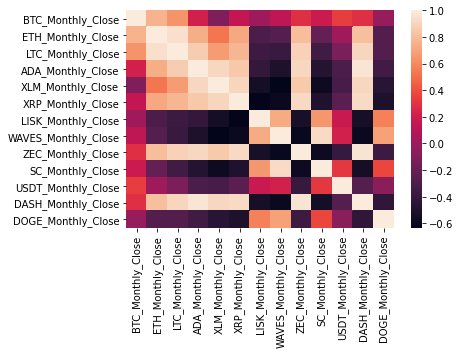

In [59]:
# Display Correlation Heatmap With Seaborn

"""
NEW CELL to check monthly returns are displayed with pct_change already applied
- Take dataframe of daily returns from step 3 (pct_change drop na already applied)

NEW CELL to check correlation dataframe
- correlation = monthly_returns_dataframe.corr()

NEW CELL to display heatmap
- sns.heatmap(correlation)


"""
correlation = final_2019_df.corr()
sns.heatmap(correlation)